In [1]:
## Cargamos paquetes
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd 


In [32]:
## Cargamos datos de remuneraciones del censo económico a nivel municipal
remuneraciones = pd.read_csv("../datos/censo_economico/remuneraciones_personal_ocupado.csv")
remuneraciones

,Año Censal,Entidad,Municipio,Actividad económica,UE Unidades económicas,J000A Total de remuneraciones (millones de pesos),H001A Personal ocupado total
0,2018,01 Aguascalientes,001 Aguascalientes,Total municipal,40547,24434.641,260249.0
1,2018,01 Aguascalientes,002 Asientos,Total municipal,845,171.849,3671.0
2,2018,01 Aguascalientes,003 Calvillo,Total municipal,2038,464.895,8618.0
3,2018,01 Aguascalientes,004 Cosío,Total municipal,334,176.758,2290.0
4,2018,01 Aguascalientes,005 Jesús María,Total municipal,4197,5411.548,49203.0
...,...,...,...,...,...,...,...
2460,2018,32 Zacatecas,054 Villa Hidalgo,Total municipal,357,10.953,640.0
2461,2018,32 Zacatecas,055 Villanueva,Total municipal,1394,71.271,3267.0
2462,2018,32 Zacatecas,056 Zacatecas,Total municipal,7641,2121.268,39892.0
2463,2018,32 Zacatecas,057 Trancoso,Total municipal,561,11.600,1161.0


In [33]:
## Calculamos los ingresos promedios mensuales
remuneraciones["ingreso_promedio_mensual"] = ((remuneraciones["J000A Total de remuneraciones (millones de pesos)"]*1_000_000)/remuneraciones["H001A Personal ocupado total"])/12
remuneraciones

,Año Censal,Entidad,Municipio,Actividad económica,UE Unidades económicas,J000A Total de remuneraciones (millones de pesos),H001A Personal ocupado total,ingreso_promedio_mensual
0,2018,01 Aguascalientes,001 Aguascalientes,Total municipal,40547,24434.641,260249.0,7824.122603
1,2018,01 Aguascalientes,002 Asientos,Total municipal,845,171.849,3671.0,3901.048761
2,2018,01 Aguascalientes,003 Calvillo,Total municipal,2038,464.895,8618.0,4495.387561
3,2018,01 Aguascalientes,004 Cosío,Total municipal,334,176.758,2290.0,6432.241630
4,2018,01 Aguascalientes,005 Jesús María,Total municipal,4197,5411.548,49203.0,9165.342222
...,...,...,...,...,...,...,...,...
2460,2018,32 Zacatecas,054 Villa Hidalgo,Total municipal,357,10.953,640.0,1426.171875
2461,2018,32 Zacatecas,055 Villanueva,Total municipal,1394,71.271,3267.0,1817.952250
2462,2018,32 Zacatecas,056 Zacatecas,Total municipal,7641,2121.268,39892.0,4431.272770
2463,2018,32 Zacatecas,057 Trancoso,Total municipal,561,11.600,1161.0,832.615561


In [34]:
## Cargamos datos del censo de población de escolaridad a nivel municipal
# GRAPROES : Grado promedio de escolaridad
# GRAPROES_F : Grado promedio de escolaridad de la población femenina
# GRAPROES_M : Grado promedio de escolaridad de la población masculina
escolaridad = pd.read_csv("../datos/censo_pob_vivienda/censo_pob_2020_grado_escolaridad_municipal.csv")
escolaridad

,ENTIDAD,MUN,GRAPROES,GRAPROES_F,GRAPROES_M
0,3,1,9.27,9.37,9.17
1,3,2,9.13,9.18,9.08
2,3,3,11.07,11.08,11.05
3,3,8,10.17,10.24,10.11
4,3,9,9.99,10.14,9.84
...,...,...,...,...,...
2464,9,13,10.84,10.76,10.92
2465,9,14,14.55,14.22,14.93
2466,9,15,12.41,12.10,12.75
2467,9,16,13.11,12.76,13.52


In [35]:
## Generamos una clave de municipio para hacer merge entre los dataframes
remuneraciones["CVEGEO"] = remuneraciones["Entidad"].apply(lambda x : x[:2]) + remuneraciones["Municipio"].apply(lambda x : x[:3])
escolaridad["CVEGEO"] = escolaridad["ENTIDAD"].apply(lambda x : f"{x:02}") + escolaridad["MUN"].apply(lambda x : f"{x:03}")

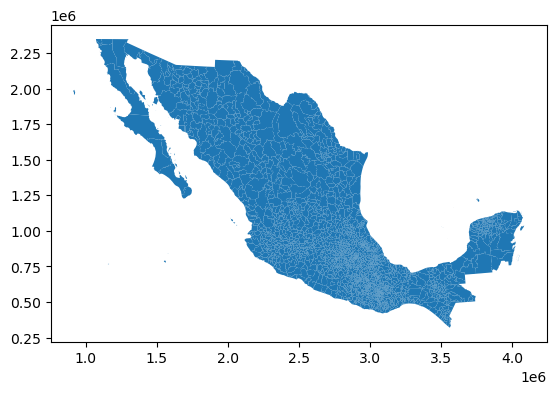

In [36]:
## Cargamos el geodataframe de municipios
municipios = gpd.read_file("../datos/shape_municipios/00mun.shp")
municipios.plot()
plt.show()

In [39]:
## Agregamos los datos de ingreso promedio mensual y de escolaridad al geodataframe
municipios = municipios.merge(right=remuneraciones[["CVEGEO", "ingreso_promedio_mensual"]], how = "left", on = "CVEGEO")
municipios = municipios.merge(right=escolaridad[["CVEGEO", "GRAPROES_F"]], how = "left", on = "CVEGEO")
municipios

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,ingreso_promedio_mensual,GRAPROES_F
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",7824.122603,10.75
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.506, 2494749.948...",3901.048761,8.68
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",4495.387561,8.31
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",6432.241630,9.10
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",9165.342222,10.25
...,...,...,...,...,...,...,...
2464,32053,32,053,Villa González Ortega,"POLYGON ((2504476.172 1180670.127, 2504478.046...",881.631906,8.59
2465,32054,32,054,Villa Hidalgo,"POLYGON ((2531223.368 1166188.348, 2531242.386...",1426.171875,8.29
2466,32055,32,055,Villanueva,"POLYGON ((2420011.778 1183552.394, 2420043.461...",1817.952250,8.27
2467,32056,32,056,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086...",4431.272770,11.57


In [40]:
### Calculamos la probabilidad de tener un empleo informal de mujer con años promedio de escolaridad de la población femenina de municipio y 
### con ingreso mensual del municipio con los coeficientes estimados por la regresión logit
import math

intercepto = 2.442195 
beta_sexo = 0.09178527
beta_escolaridad = -0.1790409
beta_ingreso = -7.116697e-05

def calcula_probabilidades(escolaridad : float, ingreso : float) -> float:
    return math.exp(intercepto + beta_sexo*1 + beta_escolaridad*escolaridad + beta_ingreso*ingreso)/ (1 + math.exp(intercepto + beta_sexo*1 + beta_escolaridad*escolaridad + beta_ingreso*ingreso))



In [45]:
proba_informalidad = [calcula_probabilidades(escolaridad, ingreso) for escolaridad,ingreso in municipios[["GRAPROES_F", "ingreso_promedio_mensual"]].to_records(index = False)]
municipios["proba_informalidad"] = proba_informalidad
municipios

,CVEGEO,CVE_ENT,CVE_MUN,NOMGEO,geometry,ingreso_promedio_mensual,GRAPROES_F,proba_informalidad
0,01001,01,001,Aguascalientes,"POLYGON ((2489072.503 1115771.584, 2489352.774...",7824.122603,10.75,0.513115
1,01002,01,002,Asientos,"POLYGON ((2494680.261 1141224.506, 2494749.948...",3901.048761,8.68,0.668693
2,01003,01,003,Calvillo,"POLYGON ((2429607.454 1120262.254, 2429071.902...",4495.387561,8.31,0.673977
3,01004,01,004,Cosío,"POLYGON ((2470517.824 1155028.588, 2470552.248...",6432.241630,9.10,0.609913
4,01005,01,005,Jesús María,"POLYGON ((2465526.729 1114740.466, 2465752.546...",9165.342222,10.25,0.511633
...,...,...,...,...,...,...,...,...
2464,32053,32,053,Villa González Ortega,"POLYGON ((2504476.172 1180670.127, 2504478.046...",881.631906,8.59,0.717739
2465,32054,32,054,Villa Hidalgo,"POLYGON ((2531223.368 1166188.348, 2531242.386...",1426.171875,8.29,0.720760
2466,32055,32,055,Villanueva,"POLYGON ((2420011.778 1183552.394, 2420043.461...",1817.952250,8.27,0.715843
2467,32056,32,056,Zacatecas,"POLYGON ((2421707.751 1202019.971, 2421780.086...",4431.272770,11.57,0.536713


<Axes: >

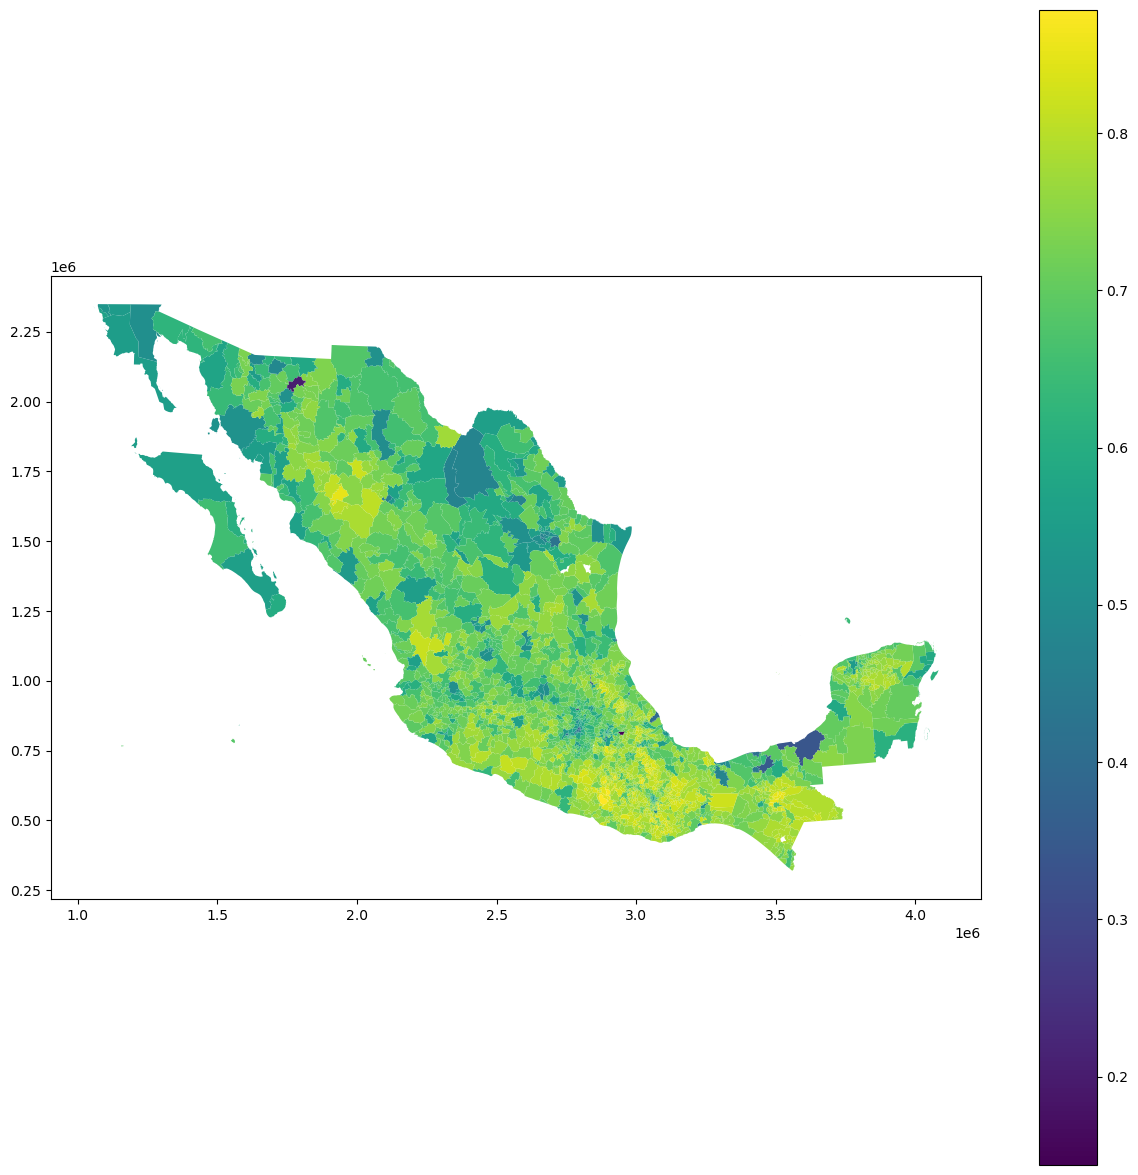

In [46]:
#### Graficamos la probabilidad a nivel municipio
municipios.plot(column='proba_informalidad', legend=True,figsize=(15, 15))
